In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Salary_Data.csv")

In [10]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


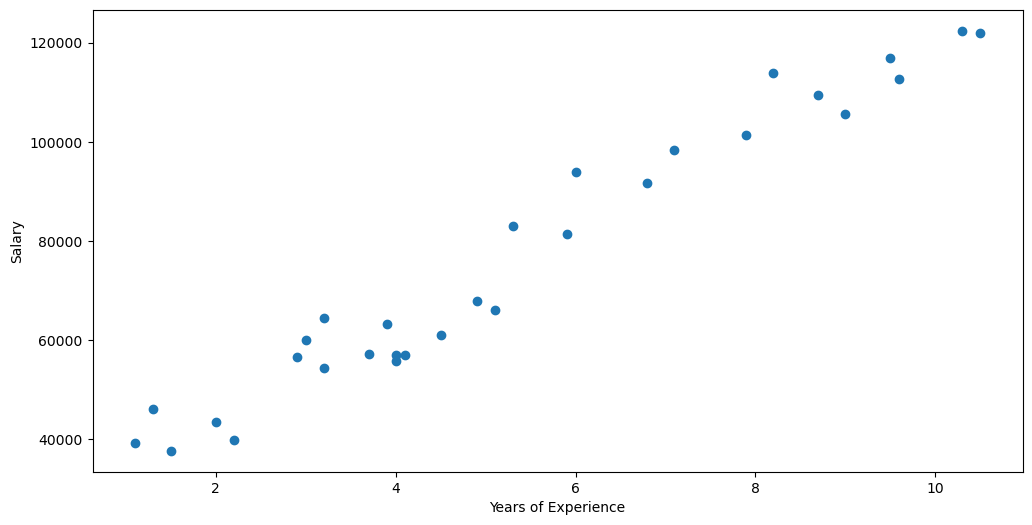

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(data.YearsExperience, data.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [30]:
X = data.YearsExperience
Y = data.Salary

In [31]:
def gradient_descent_vectorized(b0_now, b1_now, x, y, L):
    n = len(x)
    y_pred = b0_now + b1_now * x
    error = y - y_pred
    db0 = -2 * np.mean(error)
    db1 = -2 * np.mean(error * x)

    b0 = b0_now - L * db0
    b1 = b1_now - L * db1

    return b0, b1


# Initial parameters
b0 = 0
b1 = 0
L = 0.01
epochs = 10000


def fit(epochs,b0, b1,x, y, L):
    for _ in range(epochs):
        b0, b1 = gradient_descent_vectorized(b0, b1, x, y, L)
    return b0,b1

fit(epochs,b0,b1,x,y,L)
    

(25792.20019866825, 9449.962321455143)

In [42]:
def unvectorized_gradient_descent_step(b0_now, b1_now,x, y, L):
    db0 = 0
    db1 = 0
    n_samples = data.shape[0]

    for i in range(n_samples):
        x_i = X.iloc[i]
        y_i = Y.iloc[i]
        y_pred = b0_now + b1_now * x_i
        error = y_i - y_pred

        db0 += -(2 / n_samples) * error
        db1 += -(2 / n_samples) * error * x_i

    b0_new = b0_now - L * db0
    b1_new = b1_now - L * db1

    return b0_new, b1_new

b0 = 0
b1 = 0
L = 0.01
epochs = 3000

def fit(epochs,b0, b1,x,y, L):
    for _ in range(epochs):
        b0, b1 = unvectorized_gradient_descent_step(b0, b1, x,y, L)
    return b0, b1

fit(epochs,b0,b1,x,y,L)

(25792.12870850061, 9449.97293029672)

In [51]:
def loss_function(b0, b1, data):
    n_samples = data.shape[0]
    total_error = 0
    for i in range(n_samples):
        x = data.iloc[i].YearsExperience
        y = data.iloc[i].Salary

        total_error += (y - (b0 + b1*x))

    return total_error/n_samples 

loss_function(25792.12870850061,9449.97293029672,data)

0.01512185614531821

# check

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
X = np.array(data[data.columns[0]]).reshape(-1,1) # exogenuous variable must be 2D
Y = np.array(data[data.columns[1]])

In [ ]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_[0])

25792.20019866871
9449.962321455074


In [ ]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189
